# Experimental Results from a Decision Tree based NER model

Decisions Trees, as opposed to other machine learning techniques such as SVM's and Neural Networks, provide a human-interpretable classification model. We will exploit this to both generate pretty pictures and glean information for feature selection in our high dimensionality datasets.

This report will provide precision, recall, and f-measure values for Decision Trees built on the orthographic; orthograhic + morphological; orthographic + morphological + lexical feature sets for the Adverse Reaction, Indication, Active Ingredient, and Inactive Ingredient entities. A viewable Decision Tree structure will also be generated for each fold.

<hr>

The file 'decisiontree.py' builds a Decision Tree classifier on the sparse format ARFF file passed in as a parameter. This file is saved in the models directory with the format 'decisiontree\_[featuresets]\_[entity name].pkl' <br>
The file 'evaluate_decisiontree.py' evaluates a given Decision Tree model stored inside a '.pkl' file outputing appropriate statistics and saving a pdf image of the underlying decision structure associated with the given model.

All ARFF files were cleaned with 'arff_translator.py'. This cleaning consisted of removing a comma from each instance that was mistakenly inserted during file creation. 


In [1]:
#python3 arff_translator.py [filename]

# Adverse Reaction Feature Set

### Orthographic Features

In [2]:
import subprocess

""" Creates models for each fold and runs evaluation with results """
featureset = "o"
entity_name = "adversereaction"

for fold in range(1,1): #training has already been done
    training_data = "../ARFF_Files/%s_ARFF/_%s/_train/%s_train-%i.arff" % (entity_name, featureset, entity_name, fold)
    os.system("python3 decisiontree.py -tr %s" % (training_data))


for fold in range(1,11):
    testing_data = "../ARFF_Files/%s_ARFF/_%s/_test/%s_test-%i.arff" % (entity_name, featureset, entity_name, fold)
    output = subprocess.check_output("python3 evaluate_decisiontree.py -te %s" % (testing_data), shell=True)
    print(output.decode('utf-8'))

adversereaction_test-1.arff_o
Precision: 0.961538
Recall: 0.013789
F-measure: 0.027189
[[   25  1788]
 [    1 16927]]


adversereaction_test-2.arff_o
Precision: 0.750000
Recall: 0.008167
F-measure: 0.016158
[[    9  1093]
 [    3 19878]]


adversereaction_test-3.arff_o
Precision: 0.333333
Recall: 0.001961
F-measure: 0.003899
[[    1   509]
 [    2 10642]]


adversereaction_test-4.arff_o
Precision: 1.000000
Recall: 0.009394
F-measure: 0.018613
[[   11  1160]
 [    0 10655]]


adversereaction_test-5.arff_o
Precision: 0.571429
Recall: 0.010852
F-measure: 0.021299
[[   20  1823]
 [   15 18196]]


adversereaction_test-6.arff_o
Precision: 0.166667
Recall: 0.002210
F-measure: 0.004362
[[    2   903]
 [   10 13178]]


adversereaction_test-7.arff_o
Precision: 0.800000
Recall: 0.006098
F-measure: 0.012103
[[    4   652]
 [    1 18655]]


adversereaction_test-8.arff_o
Precision: 0.708333
Recall: 0.020118
F-measure: 0.039125
[[   17   828]
 [    7 15856]]


adversereaction_test-9.arff_o
Precision:

Average Precision: 	0.6329762	
Average Recall   :  0.0080615<br>
Average F-Measure:  0.0158644<br>

Rather lackluster performance.

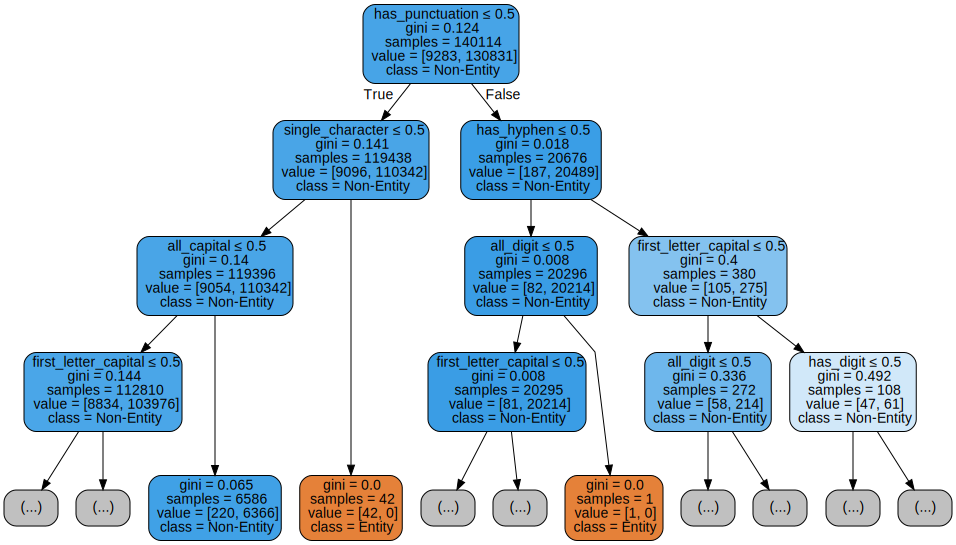

In [3]:
import graphviz
from sklearn.externals import joblib
from Tools import arff_converter
from sklearn import tree

featureset = "o" #Careful with highly dimensional datasets
entity_name = "adversereaction"

fold = 1  #change this to display a graph of the decision tree structure for a fold
training_data = "../ARFF_Files/%s_ARFF/_%s/_train/%s_train-%i.arff" % (entity_name, featureset, entity_name, fold)
dataset = arff_converter.arff2df(training_data)
dtree = joblib.load('../Models/decisiontree/%s_%s/decisiontree_%s_%s_train-%i.arff.pkl' % (entity_name, featureset, featureset, entity_name,fold))
tree.export_graphviz(dtree, 
                     out_file="visual/temptree1.dot",
                     feature_names=dataset.columns.values[:-1],
                     class_names=["Entity", "Non-Entity"], label='all',
                     filled=True, rounded=True, proportion=False, leaves_parallel=True,
                     special_characters=True,
                     max_depth=3  #change for more detail, careful with large datasets
                    )
with open("visual/temptree1.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
#graphviz.Source(dot_graph).view()
#the above line is a fullscreen alternative, also generates a temporary file that requires manual removal


The above tree suggests that solely orthograhic information may not be enough to train the classifier. Notice left subtree of the root node splits on the 'single_character' feature. Clearly an adverse reaction would not be a single character yet the tree predicts that any instance where 'single_character' holds the value of 1 would in-fact be an adverse reaction.

<hr>
### Orthographic + Morphological Features

In [3]:
import subprocess

""" Creates models for each fold and runs evaluation with results """
featureset = "om"
entity_name = "adversereaction"

for fold in range(1,1): #training has already been done
    training_data = "../ARFF_Files/%s_ARFF/_%s/_train/%s_train-%i.arff" % (entity_name, featureset, entity_name, fold)
    os.system("python3 decisiontree.py -tr %s" % (training_data))


for fold in range(1,11):
    testing_data = "../ARFF_Files/%s_ARFF/_%s/_test/%s_test-%i.arff" % (entity_name, featureset, entity_name, fold)
    output = subprocess.check_output("python3 evaluate_decisiontree.py -te %s" % (testing_data), shell=True)
    print(output.decode('utf-8'))

adversereaction_test-1.arff_om
Precision: 0.810458
Recall: 0.478764
F-measure: 0.601942
[[  868   945]
 [  203 16725]]


adversereaction_test-2.arff_om
Precision: 0.475576
Recall: 0.468240
F-measure: 0.471879
[[  516   586]
 [  569 19312]]


adversereaction_test-3.arff_om
Precision: 0.487965
Recall: 0.437255
F-measure: 0.461220
[[  223   287]
 [  234 10410]]


adversereaction_test-4.arff_om
Precision: 0.795165
Recall: 0.533732
F-measure: 0.638733
[[  625   546]
 [  161 10494]]


adversereaction_test-5.arff_om
Precision: 0.767084
Recall: 0.432447
F-measure: 0.553088
[[  797  1046]
 [  242 17969]]


adversereaction_test-6.arff_om
Precision: 0.607207
Recall: 0.372376
F-measure: 0.461644
[[  337   568]
 [  218 12970]]


adversereaction_test-7.arff_om
Precision: 0.423135
Recall: 0.423780
F-measure: 0.423458
[[  278   378]
 [  379 18277]]


adversereaction_test-8.arff_om
Precision: 0.526387
Recall: 0.460355
F-measure: 0.491162
[[  389   456]
 [  350 15513]]


adversereaction_test-9.arff_om
P

Average Precision: 	0.6423055	
Average Recall   :  0.4637322<br>
Average F-Measure:  0.5329495<br>

It appears adding in the morphological features greatly increased classifier performance.<br>
Below, find the underlying decision tree structure representing the classifier.

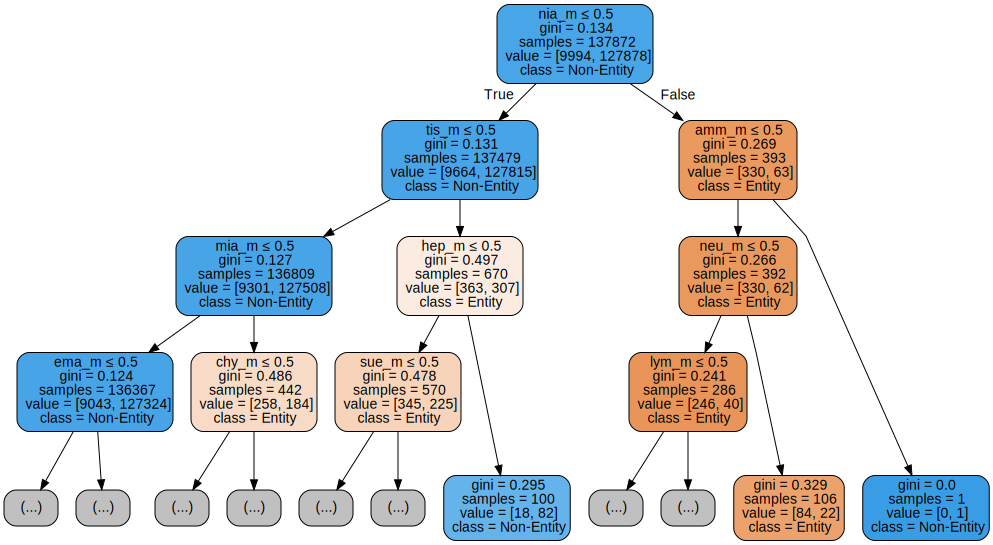

In [5]:
import graphviz
from sklearn.externals import joblib
from Tools import arff_converter
from sklearn import tree

featureset = "om" #Careful with highly dimensional datasets
entity_name = "adversereaction"

fold = 2  #change this to display a graph of the decision tree structure for a fold
training_data = "../ARFF_Files/%s_ARFF/_%s/_train/%s_train-%i.arff" % (entity_name, featureset, entity_name, fold)
dataset = arff_converter.arff2df(training_data)
dtree = joblib.load('../Models/decisiontree/%s_%s/decisiontree_%s_%s_train-%i.arff.pkl' % (entity_name, featureset, featureset, entity_name,fold))
tree.export_graphviz(dtree, 
                     out_file="visual/temptree.dot",
                     feature_names=dataset.columns.values[:-1],
                     class_names=["Entity", "Non-Entity"], label='all',
                     filled=True, rounded=True, proportion=False, leaves_parallel=True,
                     special_characters=True,
                     max_depth=3  #change for more detail, careful with large datasets
                    )
with open("visual/temptree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
#graphviz.Source(dot_graph).view()
#the above line is a fullscreen alternative, also generates a temporary file that requires manual removal


The decision tree structure above confirms that the features maximizing split purity are dominantly morphological; that is, orthographic features may just be serving as noise if they are included.

<hr>
### Orthographic + Morphological + Lexical Features

In [4]:
import subprocess

""" Creates models for each fold and runs evaluation with results """
featureset = "omt"
entity_name = "adversereaction"

for fold in range(1,1): #training has already been done
    training_data = "../ARFF_Files/%s_ARFF/_%s/_train/%s_train-%i.arff" % (entity_name, featureset, entity_name, fold)
    os.system("python3 decisiontree.py -tr %s" % (training_data))


for fold in range(1,11):
    testing_data = "../ARFF_Files/%s_ARFF/_%s/_test/%s_test-%i.arff" % (entity_name, featureset, entity_name, fold)
    output = subprocess.check_output("python3 evaluate_decisiontree.py -te %s" % (testing_data), shell=True)
    print(output.decode('utf-8'))

adversereaction_test-1.arff_omt
Precision: 0.795666
Recall: 0.708770
F-measure: 0.749708
[[ 1285   528]
 [  330 16598]]


adversereaction_test-2.arff_omt
Precision: 0.481679
Recall: 0.656080
F-measure: 0.555513
[[  723   379]
 [  778 19103]]


adversereaction_test-3.arff_omt
Precision: 0.569767
Recall: 0.672549
F-measure: 0.616906
[[  343   167]
 [  259 10385]]


adversereaction_test-4.arff_omt
Precision: 0.773176
Recall: 0.669513
F-measure: 0.717620
[[  784   387]
 [  230 10425]]


adversereaction_test-5.arff_omt
Precision: 0.703226
Recall: 0.532284
F-measure: 0.605930
[[  981   862]
 [  414 17797]]


adversereaction_test-6.arff_omt
Precision: 0.722424
Recall: 0.658564
F-measure: 0.689017
[[  596   309]
 [  229 12959]]


adversereaction_test-7.arff_omt
Precision: 0.537500
Recall: 0.786585
F-measure: 0.638614
[[  516   140]
 [  444 18212]]


adversereaction_test-8.arff_omt
Precision: 0.508292
Recall: 0.725444
F-measure: 0.597757
[[  613   232]
 [  593 15270]]


adversereaction_test-9.a

Average Precision: 	0.6639918	
Average Recall   :  0.6856795<br>
Average F-Measure:  0.6662661<br>

The addition of lexical features clearly assists the classifiers recall of the minority class. It appears, however, that the inclusion of lexical features leads to lowering of classifier precision relative to recall. This suggests that the inclusion of lexical features introduces noise that skews the decision boundary towards the majority 'Non-entity' class but still is necessary to strengthen the boundary around the minority class as shown by the higher recall scores.

The undersampling of majority class instances coupled with feature selection may lead to favorable results on this set of combined features.

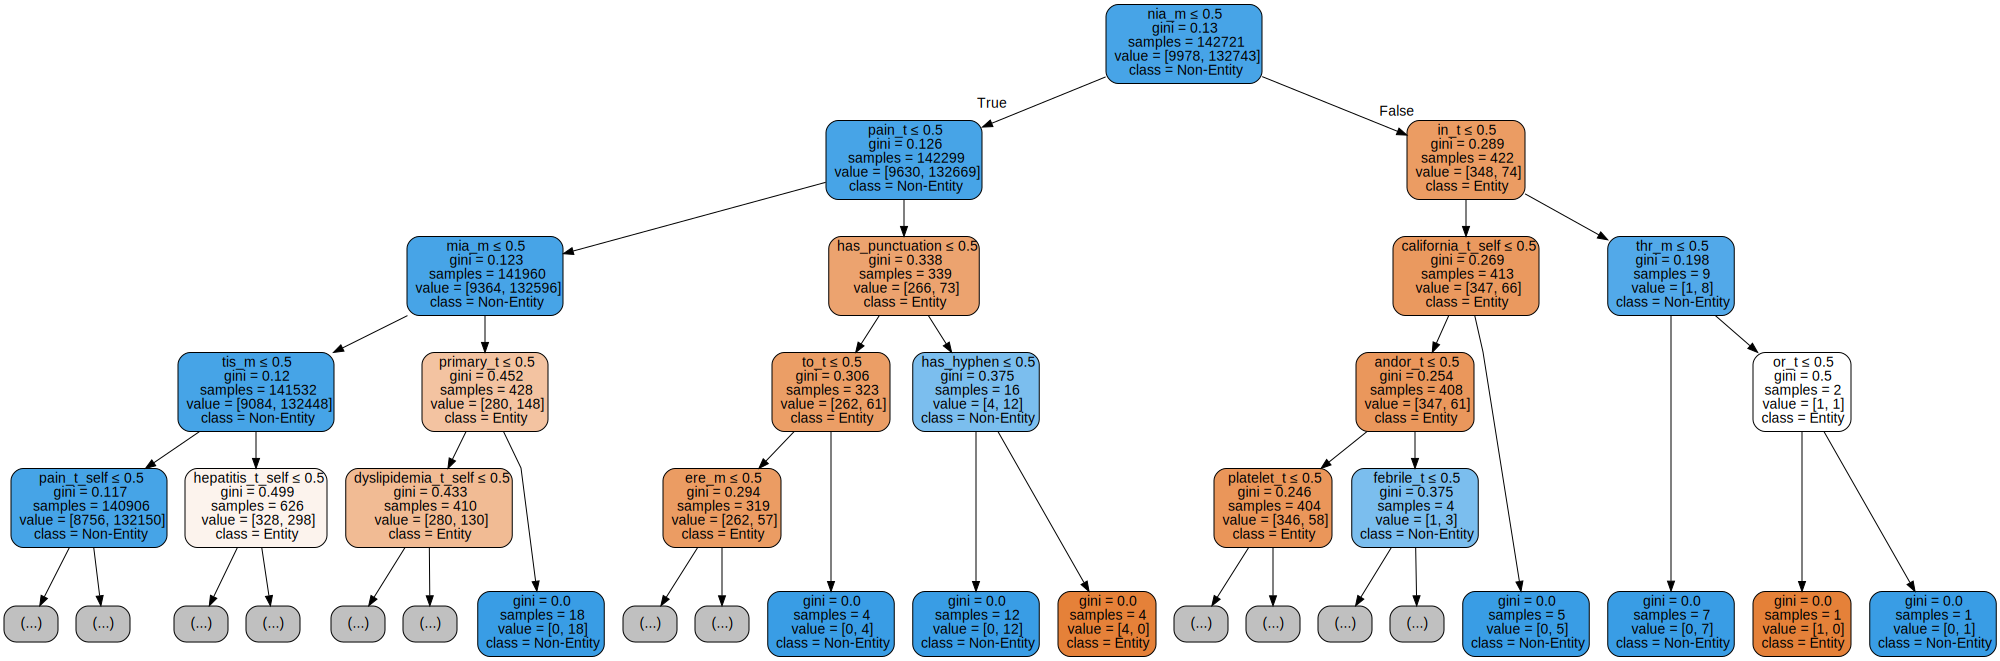

In [1]:
import graphviz
from sklearn.externals import joblib
from Tools import arff_converter
from sklearn import tree

featureset = "omt" #Careful with large datasets
entity_name = "adversereaction"

fold = 10  #change this to display a graph of the decision tree structure for a fold
training_data = "../ARFF_Files/%s_ARFF/_%s/_train/%s_train-%i.arff" % (entity_name, featureset, entity_name, fold)
dataset = arff_converter.arff2df(training_data)
dtree = joblib.load('../Models/decisiontree/%s_%s/decisiontree_%s_%s_train-%i.arff.pkl' % (entity_name, featureset, featureset, entity_name,fold))
tree.export_graphviz(dtree, 
                     out_file="visual/temp1.dot",
                     feature_names=dataset.columns.values[:-1],
                     class_names=["Entity", "Non-Entity"], label='all',
                     filled=True, rounded=True, proportion=False, leaves_parallel=True,
                     special_characters=True,
                     max_depth=4  #change for more detail, careful with large datasets
                    )
with open("visual/temp1.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
#graphviz.Source(dot_graph).view()
#the above line is a fullscreen alternative, also generates a temporary file that requires manual removal


### Morphological Feature Set